In [1]:
%pip install pythainlp

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install thaispellcheck

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install wordcloud

In [5]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import emoji
import thaispellcheck 
from wordcloud import WordCloud
import os
from pythainlp.corpus.common import thai_stopwords
from pythainlp.util import normalize
from pythainlp.util import eng_to_thai
from pythainlp import word_tokenize
from pythainlp.ulmfit import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering

## Import Data and EDA

In [6]:
pd.set_option('display.max_colwidth', None)
df = pd.read_excel('fb_data.xlsx')
df.head()

no  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                      Author  \
0                            {"id":"8523531204387158","name":"Rita Khurana Insari","url":""}   
1  {"id":"140733978544","name":"SCB Thailand","url":"https://www.facebook.com/scb.thailand"}   
2                                   {"id":"5712295208858315","name":"Panu Bee Rot","url":""}   
3                             {"id":"4736040543178421","name":"Chattip Rueangchan","url":""}   
4                                    {"id":"6268934096469197","name":"Kirino Yome","url":""}   

                                    URL          Author_Name  \
0                               unknown  Rita Khurana Insari   
1  ttps://www.facebook.com/scb.thailand         SCB Thailand   
2                               unknown         Panu Bee Rot   
3                               unknown   Chattip Rueangchan   
4                               unknown          Kirino Yome   

           Authorid  Comments Content_type        Created_time  \
0  8523531204387160         0      comment 2022-11-19 09:28:28   
1      140733978544         0      comment 2022-11-13 05:14:41   
2  5712295208858315         1      comment 2022-11-01 09:10:59   
3  4736040543178421         1      comment 2022-11-26 11:43:18   
4  6268934096469197         1      comment 2022-11-03 01:24:13   

                              Post_id  Interactions  \
0   10158888031976245_855551435478269             0   
1   10160136840803545_612484020562871             0   
2  10160442890776241_1776348302714476             1   
3   10160614418830030_538126048191818             1   
4   10161166811591554_530307902271282             1   

                                                                                                                                                                                                                                                                                                          Post_text  \
0                                                                                                                                                            ซื้อมอเตอร์ไซค์HondaClickตัวใหม่ที่นิยมพานิชสาขาเชียงใหม่ตั้งแต่วันที่4522จนป่านนี้บอกทะเบียนยังๆไม่ได้ทันคืออะไรคะรถใหม่พึ่งซื้อรถก็มีปัญหาแล้วแย่มาก   
1  อย่างไรแนะนำท่านตรวจสอบรายการเพิ่มเติมอีกครั้งช่วงเช้าหลัง0600นเป็นต้นไปอีกครั้งนะคะหรือเพื่อให้ธนาคารได้ตรวจสอบข้อมูลรบกวนท่านแจ้งเป็นชื่อนามสกุลและหมายเลขติดต่อกลับผ่านทางInboxFacebookคลิกhttpsmmescbthailandโดยพิมพ์คำว่าติดต่อเจ้าหน้าที่และเลือกเรื่องที่ต้องการขอรับบริการเช่นด้านบัญชีเงินฝากได้เลยนะคะ   
2                                                                                                                                                                                                                       แสกนหน้าไม่ผ่านทำไมแอฟของภาครัฐชอบให้แสกนหน้าจังครับเป๋าตังธกสแต่แสกนไม่ผ่านต้องไปธนาคารอีก   
3           ร่วมกิจกรรมค่ะBCGModelแนวคิดหลักของAPEC2022คือเศรษฐกิจชีวภาพเศรษฐกิจหมุนเวียนเศรษฐกิจสีเขียวBCGที่บางจากทำคือแผนงานBCP316NETของกลุ่มบางจากฯที่ใช้ในการดำเนินธุรกิจเพื่อสนองต่อเป้าหมายลดการปล่อยก๊าซเรือนกระจกเป็นศูนย์์NETzeroในปีคศ2050ให้เกิดประโยชน์สูงสุดและใช้อย่างคุ้มค่าค่ะQUIZTIMEWITHAPEC2022   
4                                                                                           เน็ตคุณทำให้มันดีๆหน่อยครับเดี๋ยวก็หลุดเดี๋ยวก็ให้ไม่ได้หัวร้อนมากอุส่าย้ายค่ายมาผมให้เน็ต8mbไม่จำกัดไม่ลดสปีดแม้แต่ดูยูทูปยังหมุนเลยเน็ตหลุดบางทีก็หลุดโคตรนานกว่าจะกลับมาใช้ได้เมื่อก่อนAisเน็ตเสถียนกว่านี้มากนะครับ   

   Platform  Potential_impressions     profileid  shares  \
0  facebook                      0  110618771244       0   
1  facebook                      0  140733978544       0   
2  facebook                      0  233952216240       0   
3  facebook                      0  312351465029       0   
4  facebook                      0  127434041553       0   

             query_name       

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   no                     996 non-null    int64         
 1   Author                 996 non-null    object        
 2   URL                    996 non-null    object        
 3   Author_Name            996 non-null    object        
 4   Authorid               996 non-null    object        
 5   Comments               996 non-null    int64         
 6   Content_type           996 non-null    object        
 7   Created_time           996 non-null    datetime64[ns]
 8   Post_id                996 non-null    object        
 9   Interactions           996 non-null    int64         
 10  Post_text              996 non-null    object        
 11  Platform               996 non-null    object        
 12  Potential_impressions  996 non-null    int64         
 13  profi

**In EXCEL**, 
- I cut down 3 rows which dont have text in Post_text column
- extracted url and name frome author column to URL and Author_Name column
- changed type column following this rule: 
    - If any row has url, I assume that row is influencer or news type. (watching URL and Author_Name column) 
    - I manual changed type from influencer to news by checking (New, ข่าว, TV) in Author_Name 
    - I set all other rows which were not News, User to Influencer type in type column (ถือว่าเป็น Influencer เพราะจากข้อมูลส่วนมากเป็นเพจ มี url และมีจุดประสงค์ต้องการให้คนเข้ามา interact เข้ามาดู สามารถวิเคราะห์เพื่อเพิ่ม engagement ได้ ต่างจาก user ที่มีจุดประสงค์เข้ามาเสพเป็นส่วนใหญ่)
- assigned "anonymous" in missing values in Authorid column beacause all of them are user
- assigned "อื่นๆ" in missing values in query_name column because I cant arbitrary assign query name by lookin post_text content.

In [8]:
df['query_name'].unique()

array(['Life_Motorcycle', 'Business_Banking', 'Thailand_Environment',
       'AMPT', 'อื่นๆ', 'ลิขสิทธิ์บอลโลก',
       'Thailand_Law_ต่างชาติถือครองที่ดิน', 'Move1',
       'Thailand_constitution', 'UTNP',
       'Culture_TV and Entertainment (Series)', 'Culture_Art and Design',
       'Life_Travel (Thai)', 'What if_EV Car', 'Life_Car',
       'สถานีชาร์จรถยนต์ไฟฟ้า', 'ประกันรถยนต์ไฟฟ้า',
       'Thailand_Corruption', 'Culture_Book', 'COKE vs PEPSI ', 'Move2',
       'Life_Travel (Foreign)', 'Thailand_Envi_สาธารณสุข',
       'Business_Insurance', 'Thailand_Infra_คมนาคม', 'CP กับ Worldcup',
       'Business_Economy (อุตสาหกรรม)', 'Business_Crypto', 'Life_EV Car',
       'Business_WorkLife', 'Christmas Gift_2022', 'AMPP',
       'Business_Gold Investment'], dtype=object)

In [9]:
df['type'].unique()

array(['User', 'INFLUENCER', 'NEWS'], dtype=object)

## Text Preprocessing and Cleaning

In [10]:
thai_stopwords = list(thai_stopwords())

In [11]:
# remove emoji
def remove_emoji(text):
    return ''.join([c for c in text if c not in emoji.EMOJI_DATA])

In [12]:
# filter URL website out 
def filter_web(text):
    pattern = r"^http"
    filtered_list = [item for item in text if not re.match(pattern, item.lower())]
    return filtered_list

In [13]:
# remove stop word, punctuation
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","€","@","%","#","*","&","~"))
    final = "".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final

In [14]:
# cleaning text,  tokenizing into tokens and preparing for next step
df['text_tokens'] = df['Post_text'].apply(remove_emoji).apply(text_process).apply(process_thai).apply(filter_web).apply(lambda x: ' '.join(x))
df.head()

no  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                                                      Author  \
0                            {"id":"8523531204387158","name":"Rita Khurana Insari","url":""}   
1  {"id":"140733978544","name":"SCB Thailand","url":"https://www.facebook.com/scb.thailand"}   
2                                   {"id":"5712295208858315","name":"Panu Bee Rot","url":""}   
3                             {"id":"4736040543178421","name":"Chattip Rueangchan","url":""}   
4                                    {"id":"6268934096469197","name":"Kirino Yome","url":""}   

                                    URL          Author_Name  \
0                               unknown  Rita Khurana Insari   
1  ttps://www.facebook.com/scb.thailand         SCB Thailand   
2                               unknown         Panu Bee Rot   
3                               unknown   Chattip Rueangchan   
4                               unknown          Kirino Yome   

           Authorid  Comments Content_type        Created_time  \
0  8523531204387160         0      comment 2022-11-19 09:28:28   
1      140733978544         0      comment 2022-11-13 05:14:41   
2  5712295208858315         1      comment 2022-11-01 09:10:59   
3  4736040543178421         1      comment 2022-11-26 11:43:18   
4  6268934096469197         1      comment 2022-11-03 01:24:13   

                              Post_id  Interactions  \
0   10158888031976245_855551435478269             0   
1   10160136840803545_612484020562871             0   
2  10160442890776241_1776348302714476             1   
3   10160614418830030_538126048191818             1   
4   10161166811591554_530307902271282             1   

                                                                                                                                                                                                                                                                                                          Post_text  \
0                                                                                                                                                            ซื้อมอเตอร์ไซค์HondaClickตัวใหม่ที่นิยมพานิชสาขาเชียงใหม่ตั้งแต่วันที่4522จนป่านนี้บอกทะเบียนยังๆไม่ได้ทันคืออะไรคะรถใหม่พึ่งซื้อรถก็มีปัญหาแล้วแย่มาก   
1  อย่างไรแนะนำท่านตรวจสอบรายการเพิ่มเติมอีกครั้งช่วงเช้าหลัง0600นเป็นต้นไปอีกครั้งนะคะหรือเพื่อให้ธนาคารได้ตรวจสอบข้อมูลรบกวนท่านแจ้งเป็นชื่อนามสกุลและหมายเลขติดต่อกลับผ่านทางInboxFacebookคลิกhttpsmmescbthailandโดยพิมพ์คำว่าติดต่อเจ้าหน้าที่และเลือกเรื่องที่ต้องการขอรับบริการเช่นด้านบัญชีเงินฝากได้เลยนะคะ   
2                                                                                                                                                                                                                       แสกนหน้าไม่ผ่านทำไมแอฟของภาครัฐชอบให้แสกนหน้าจังครับเป๋าตังธกสแต่แสกนไม่ผ่านต้องไปธนาคารอีก   
3           ร่วมกิจกรรมค่ะBCGModelแนวคิดหลักของAPEC2022คือเศรษฐกิจชีวภาพเศรษฐกิจหมุนเวียนเศรษฐกิจสีเขียวBCGที่บางจากทำคือแผนงานBCP316NETของกลุ่มบางจากฯที่ใช้ในการดำเนินธุรกิจเพื่อสนองต่อเป้าหมายลดการปล่อยก๊าซเรือนกระจกเป็นศูนย์์NETzeroในปีคศ2050ให้เกิดประโยชน์สูงสุดและใช้อย่างคุ้มค่าค่ะQUIZTIMEWITHAPEC2022   
4                                                                                           เน็ตคุณทำให้มันดีๆหน่อยครับเดี๋ยวก็หลุดเดี๋ยวก็ให้ไม่ได้หัวร้อนมากอุส่าย้ายค่ายมาผมให้เน็ต8mbไม่จำกัดไม่ลดสปีดแม้แต่ดูยูทูปยังหมุนเลยเน็ตหลุดบางทีก็หลุดโคตรนานกว่าจะกลับมาใช้ได้เมื่อก่อนAisเน็ตเสถียนกว่านี้มากนะครับ   

   Platform  Potential_impressions     profileid  shares  \
0  facebook                      0  110618771244       0   
1  facebook                      0  140733978544       0   
2  facebook                      0  233952216240       0   
3  facebook                      0  312351465029       0   
4  facebook                      0  127434041553       0   

             query_name       

## Feature Extraction

### TF-IDF

In [15]:
# Feature extraction tranform text into numerical matrix using TF-IDF 
vectorizer = TfidfVectorizer(max_df=0.5,min_df=2)
x = vectorizer.fit_transform(df['text_tokens'])
x.toarray().shape

(996, 4659)

### Latent Semantic Analysis Dimension Reduction

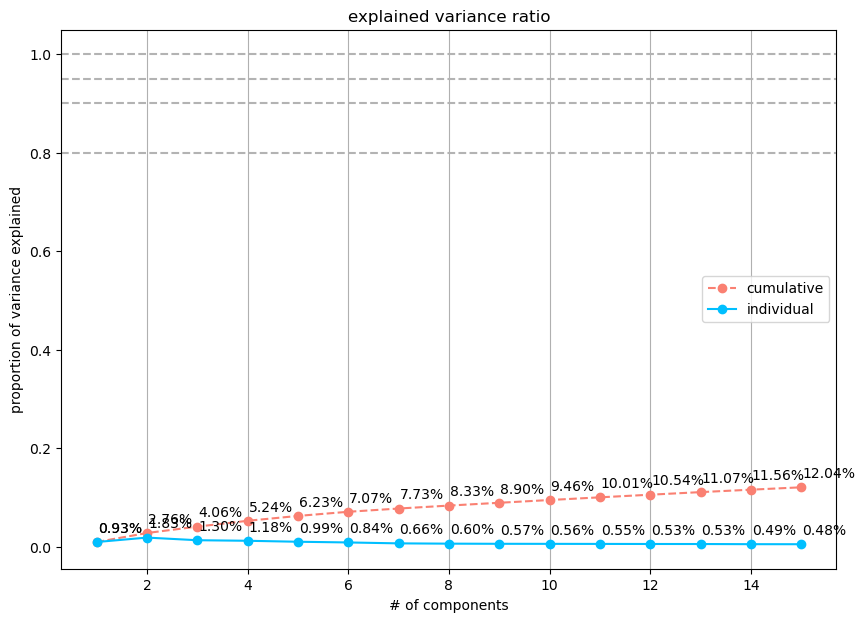

In [16]:
# LSA dimensional reduction
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    max_components = min(X.shape)
    lsa = TruncatedSVD(n_components=n_components,n_iter=5, random_state=42)
    lsa_matrix = lsa.fit_transform(X)
    x=np.arange(1, n_components+1)
    y1=lsa.explained_variance_ratio_[:n_components]
    y2=np.cumsum(lsa.explained_variance_ratio_)[:n_components]
    plt.figure(figsize=figsize)
    marker='o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)
scree_plot(x,15,True,True)

Seem more components are good for model which amount should we use?

In [17]:
for i in range(1,1000,100):
    lsa = TruncatedSVD(n_components=i,n_iter=5, random_state=42)
    lsa_matrix = lsa.fit_transform(x)
    print(i)
    print('Cumulative exp var ratio:{}'.format(np.cumsum(lsa.explained_variance_ratio_)[i-1]))

1
Cumulative exp var ratio:0.009301259445253396
101
Cumulative exp var ratio:0.37554320165458577
201
Cumulative exp var ratio:0.5473778734356222
301
Cumulative exp var ratio:0.6705202111719605
401
Cumulative exp var ratio:0.7650185924236054
501
Cumulative exp var ratio:0.8391168816503362
601
Cumulative exp var ratio:0.896527270205845
701
Cumulative exp var ratio:0.9401613403101756
801
Cumulative exp var ratio:0.9720127004714538
901
Cumulative exp var ratio:0.9930226925258564


We can use 500 n_components of LSA dimension reduction to cover 80 % of all information.

## KMEAN

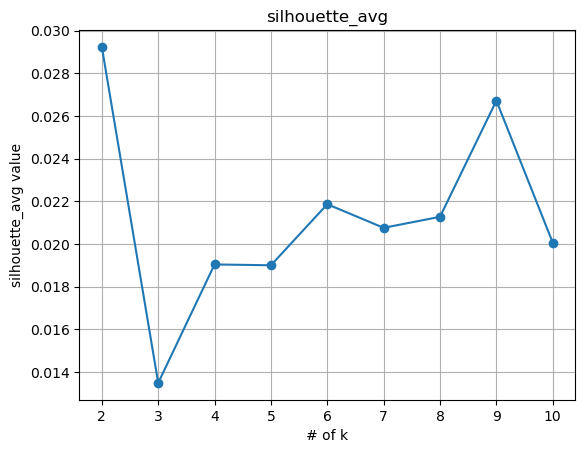

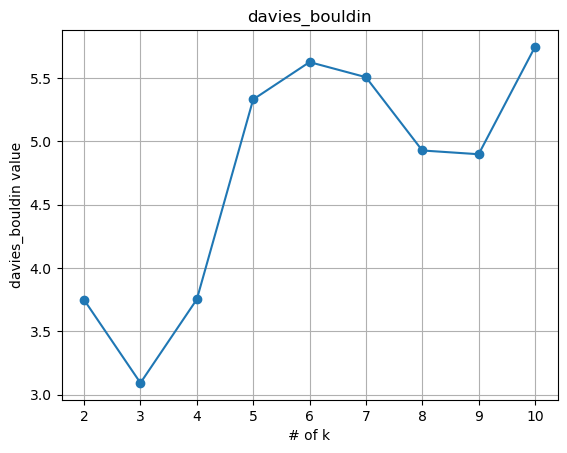

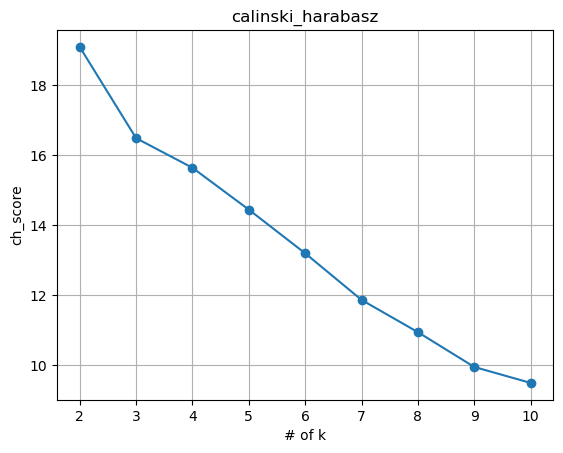

In [18]:
def elbow_method(x):
    lsa = TruncatedSVD(n_components=500,n_iter=5, random_state=42)
    lsa_matrix = lsa.fit_transform(x)
    w=[]
    u=[]
    v=[]
    for i in range(2,11):
        kmeans = KMeans(n_clusters=i,random_state=42,n_init=50,init='k-means++')
        kmeans.fit(lsa_matrix)
        # Silhouette score
        silhouette_avg = silhouette_score(lsa_matrix, kmeans.labels_)
        # Davies-Bouldin score
        davies_bouldin = davies_bouldin_score(lsa_matrix, kmeans.labels_)
        # Calinski-Harabasz Score
        ch_score = calinski_harabasz_score(lsa_matrix, kmeans.labels_)
        w.append(silhouette_avg)
        u.append(davies_bouldin)
        v.append(ch_score)
        
    plt.title('silhouette_avg')
    plt.plot(range(2, 11), w, marker='o', linestyle='-')
    plt.xlabel('# of k')
    plt.ylabel('silhouette_avg value')
    plt.grid(True)
    plt.show()
    
    plt.title('davies_bouldin')
    plt.plot(range(2, 11), u, marker='o', linestyle='-')
    plt.xlabel('# of k')
    plt.ylabel('davies_bouldin value')
    plt.grid(True)
    plt.show()
    
    plt.plot(range(2, 11), v, marker='o', linestyle='-')
    plt.title('calinski_harabasz')
    plt.xlabel('# of k')
    plt.ylabel('ch_score')
    plt.grid(True)
    plt.show()
elbow_method(x)

We suggest k = 2 is best for selecting k

In [19]:
# apply 500 components LSA dimension reduction
lsa = TruncatedSVD(n_components=500,n_iter=5, random_state=42)
lsa_matrix = lsa.fit_transform(x)

# Apply K-Means
K = 2
kmeans = KMeans(n_clusters=K,random_state=42,n_init=50,init='k-means++')
kmeans.fit(lsa_matrix)

# Get cluster assignments for each document
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'].value_counts()

0    917
1     79
Name: kmeans_labels, dtype: int64

In [20]:
# evaluate model
# Silhouette score
silhouette_avg = silhouette_score(lsa_matrix, kmeans.labels_)
# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(lsa_matrix, kmeans.labels_)
# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(lsa_matrix, kmeans.labels_)
print("silhouette_avg : {}".format(silhouette_avg)) # measure intra and inter (-1,+1) high is good
print("davies_bouldin : {}".format(davies_bouldin)) # measure similarity low value is suggest that clustering algorithm has produced compact and well-defined clusters
print("Calinski-Harabasz : {}".format(ch_score)) # คำนวณการกระจายของข้อมูลในกลุ่มเดียวกัน เทียบกับการกระจายระหว่างกลุ่ม too high too good

silhouette_avg : 0.029237813155227232
davies_bouldin : 3.7484376441665983
Calinski-Harabasz : 19.081437210316295


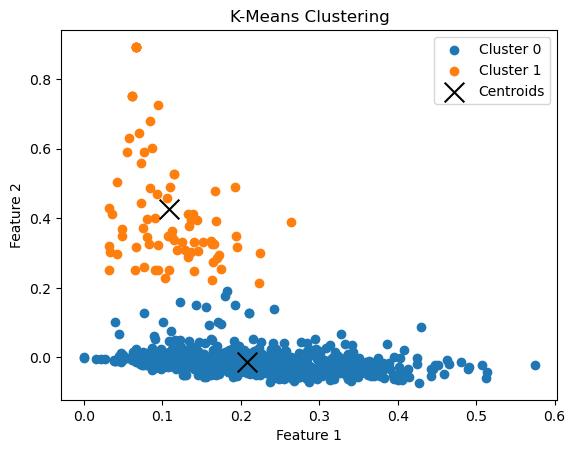

In [21]:
labels = kmeans.labels_
# Create a scatter plot for each cluster
for cluster_label in np.unique(labels):
    plt.scatter(lsa_matrix[labels == cluster_label, 0], lsa_matrix[labels == cluster_label, 1], label=f'Cluster {cluster_label}')

# Plot cluster centers (optional)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

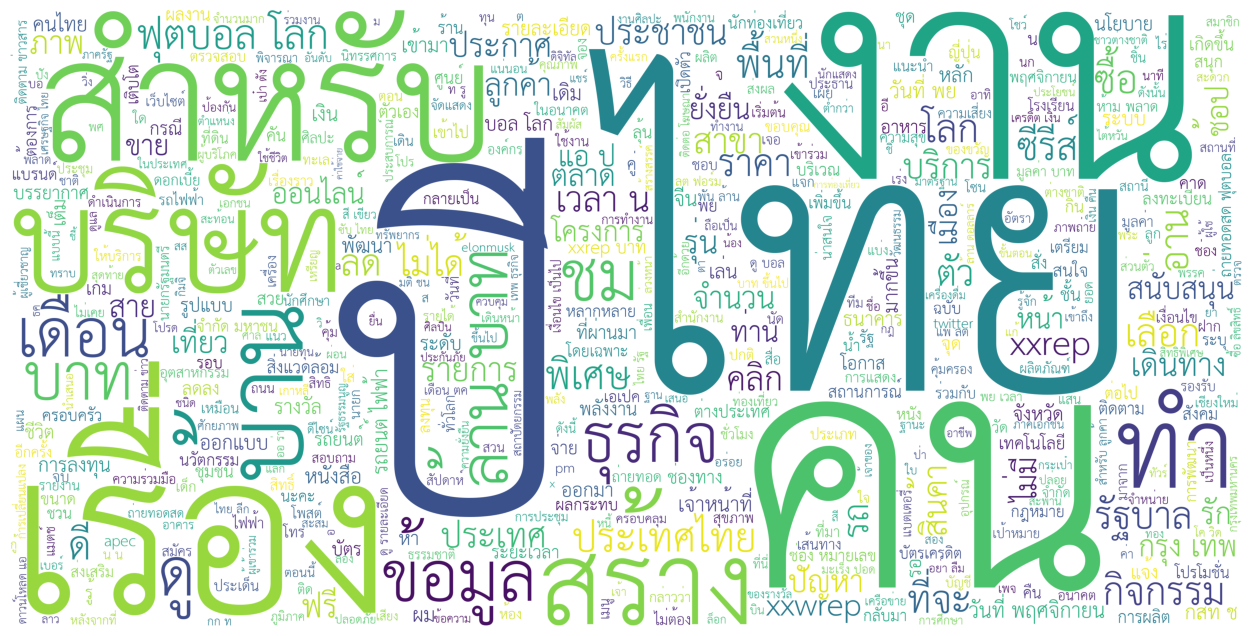

In [22]:
font_path = os.path.abspath('THSarabunNew.ttf')
pos_word_all = " ".join(text for text in df[df['kmeans_labels']==0]['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=500, height = 2000, width=4000, font_path=font_path, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

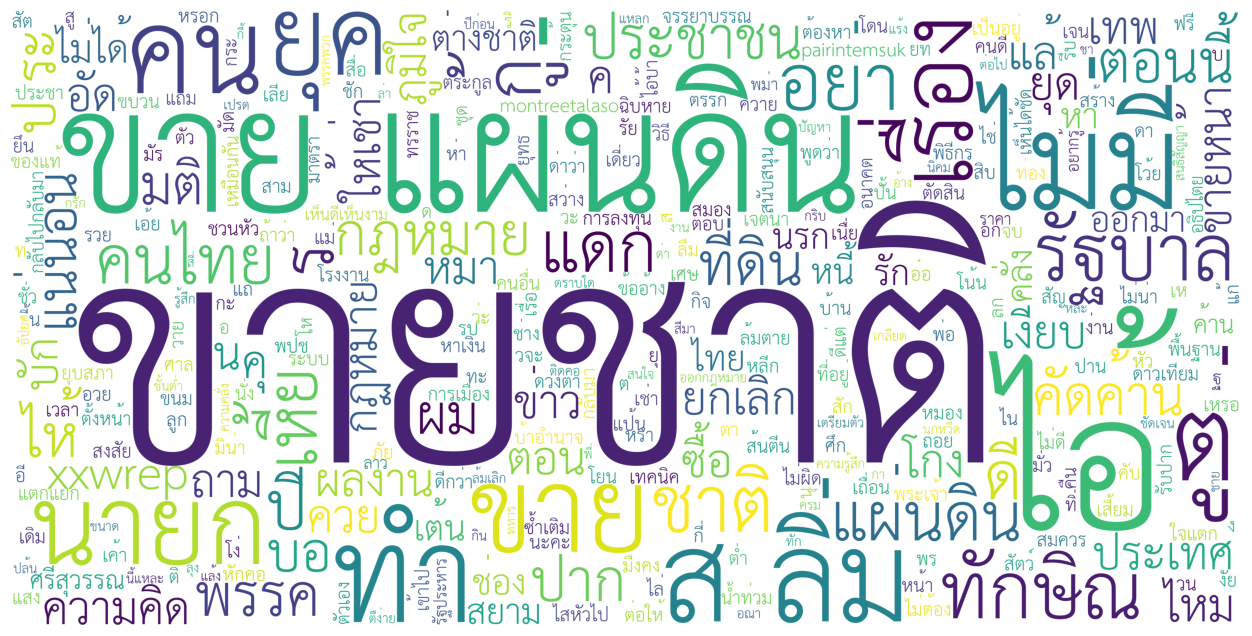

In [23]:
pos_word_all = " ".join(text for text in df[df['kmeans_labels']==1]['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=500, height = 2000, width=4000, font_path=font_path, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In wordcloud visualization is quite good result in clustering them into 2 clusters.

## Topic Modeling LDA

In [24]:
num_topics = 2  # Number of topics to extract
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the DTM
lda.fit(x)

terms = vectorizer.get_feature_names_out()
num_top_words = 20
for i, topic in enumerate(lda.components_):
    top_terms = [terms[idx] for idx in topic.argsort()[:-num_top_words - 1:-1]]
    print(f"Topic {i + 1}: {', '.join(top_terms)}")
    
    
doc_topic_matrix = lda.transform(x)
doc_topic_matrix

Topic 1: ขายชาต, ตบอล, บอล, โลก, ไอ, ายทอดสด, ขาย, แผ, กสท, ขส, นด, พวก, นายก, 2022, คนไทย, 64, กก, ดค, แมตช, 600
Topic 2: ใน, การ, ของ, ไม, อย, เพ, ให, าง, จะ, อน, เร, มา, ไทย, จาก, เด, อม, ไป, แล, หน, าย


array([[0.0972825 , 0.9027175 ],
       [0.07511329, 0.92488671],
       [0.1344967 , 0.8655033 ],
       ...,
       [0.35445844, 0.64554156],
       [0.06545089, 0.93454911],
       [0.82607817, 0.17392183]])

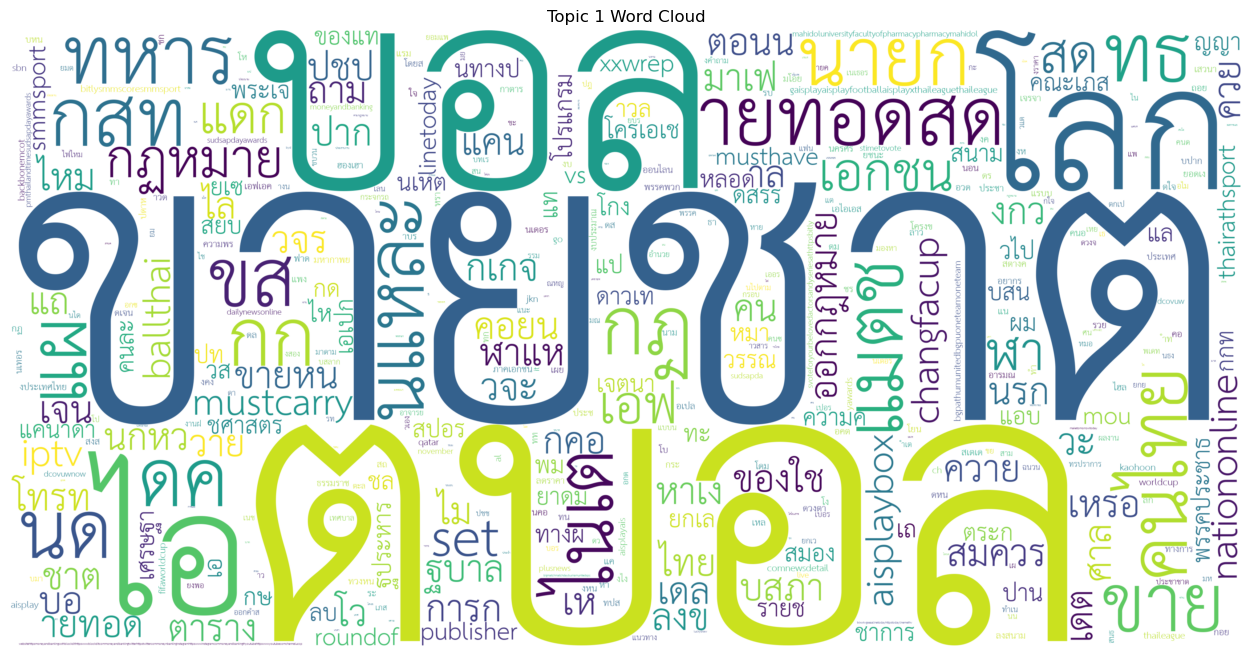

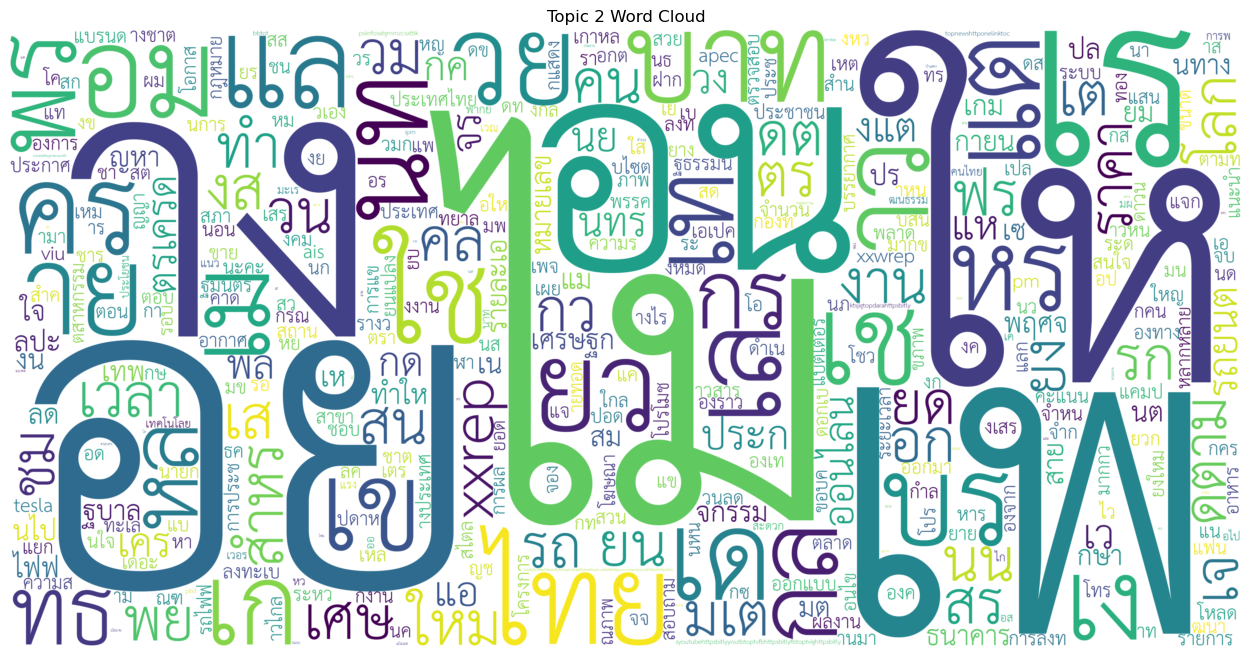

In [25]:
def generate_word_clouds(lda_model, num_words):
    font_path = os.path.abspath('THSarabunNew.ttf')
    reg = r"[ก-๙a-zA-Z']+"
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-num_words - 1:-1]
        top_words = [terms[i] for i in top_words_idx]
        wordcloud = WordCloud(background_color='white',stopwords=thai_stopwords,font_path=font_path, regexp=reg,max_words=num_words, height = 2000, width=4000).generate(' '.join(top_words))
        plt.figure(figsize=(16, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_idx + 1} Word Cloud')
        plt.axis('off')
        plt.show()

generate_word_clouds(lda,500)

Beacause of LDA has quite different metric to evaluate compare with KMEANS or other. So we use wordcloud visualization to see overall performance. From wordcloud above,it seems LDA topic modeling is not work. topic did not well seperate and word looked terrible.

## DBSCAN

In [26]:
lsa = TruncatedSVD(n_components=500,n_iter=5, random_state=42)
lsa_matrix = lsa.fit_transform(x)
# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.8, min_samples=15)  # Adjust hyperparameters as needed

# Perform clustering on the LSA matrix
cluster_labels = dbscan.fit_predict(lsa_matrix)
# Silhouette score
silhouette_avg = silhouette_score(lsa_matrix, cluster_labels)
# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(lsa_matrix, cluster_labels)
# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(lsa_matrix, cluster_labels)
print("silhouette_avg : {}".format(silhouette_avg)) # measure intra and inter (-1,+1) high is good
print("davies_bouldin : {}".format(davies_bouldin)) # measure similarity low value is suggest that clustering algorithm has produced compact and well-defined clusters
print("Calinski-Harabasz : {}".format(ch_score)) # คำนวณการกระจายของข้อมูลในกลุ่มเดียวกัน เทียบกับการกระจายระหว่างกลุ่ม too high too good

silhouette_avg : 0.004258608708438043
davies_bouldin : 1.7840951730820924
Calinski-Harabasz : 13.406873563203808


In [27]:
df['dbscan'] = cluster_labels 
df['dbscan'].value_counts()

-1    977
 0     19
Name: dbscan, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


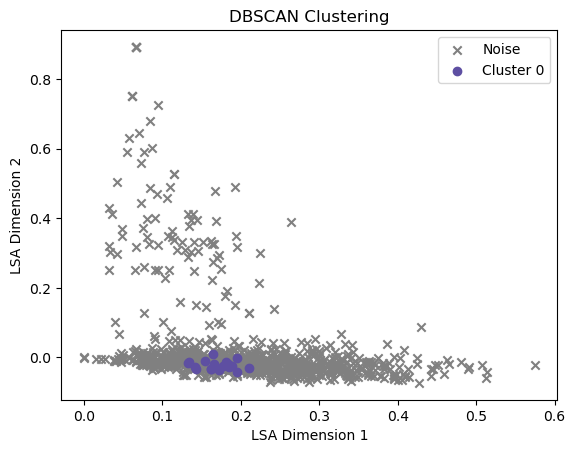

In [28]:
unique_labels = np.unique(cluster_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Handle noise points (cluster label -1)
        noise_mask = (cluster_labels == label)
        plt.scatter(lsa_matrix[noise_mask, 0], lsa_matrix[noise_mask, 1], c='gray', marker='x', label='Noise')
    else:
        cluster_mask = (cluster_labels == label)
        plt.scatter(lsa_matrix[cluster_mask, 0], lsa_matrix[cluster_mask, 1], c=color, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('LSA Dimension 1')
plt.ylabel('LSA Dimension 2')
plt.legend(loc='best')
plt.show()

This method is not good for this dataset. As we can see in this graph,it cant cluster data properly. So as the evaluate model value is more worst than KMEANS.

## Hierarchical clustering

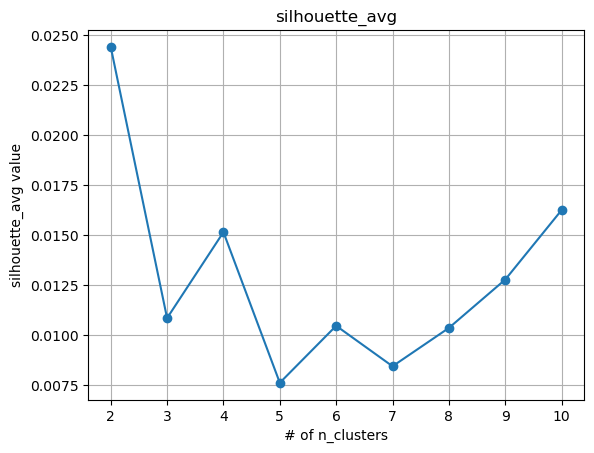

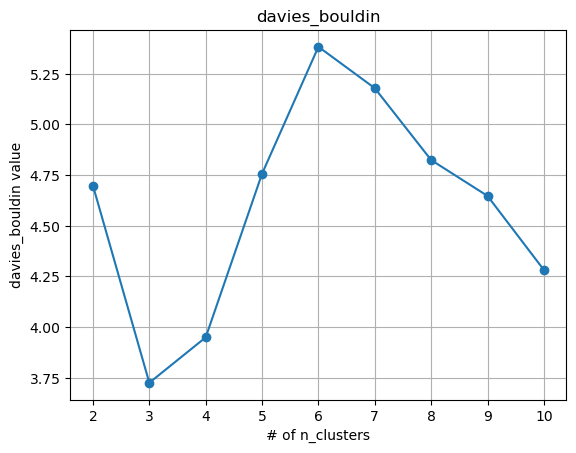

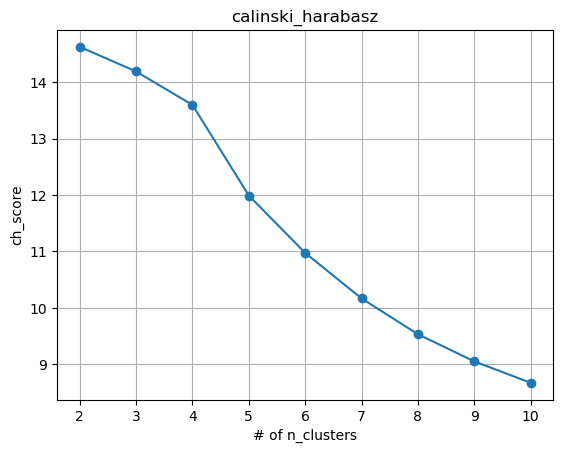

In [29]:
def elbow_method(x):
    lsa = TruncatedSVD(n_components=500,n_iter=5, random_state=42)
    lsa_matrix = lsa.fit_transform(x)
    w=[]
    u=[]
    v=[]
    for i in range(2,11):
        agg_clustering = AgglomerativeClustering(n_clusters=i,linkage='ward',affinity='euclidean')
        cluster_labels = agg_clustering.fit_predict(lsa_matrix)
        # Silhouette score
        silhouette_avg = silhouette_score(lsa_matrix, cluster_labels)
        # Davies-Bouldin score
        davies_bouldin = davies_bouldin_score(lsa_matrix, cluster_labels)
        # Calinski-Harabasz Score
        ch_score = calinski_harabasz_score(lsa_matrix, cluster_labels)
        w.append(silhouette_avg)
        u.append(davies_bouldin)
        v.append(ch_score)
        
    plt.title('silhouette_avg')
    plt.plot(range(2, 11), w, marker='o', linestyle='-')
    plt.xlabel('# of n_clusters')
    plt.ylabel('silhouette_avg value')
    plt.grid(True)
    plt.show()
    
    plt.title('davies_bouldin')
    plt.plot(range(2, 11), u, marker='o', linestyle='-')
    plt.xlabel('# of n_clusters')
    plt.ylabel('davies_bouldin value')
    plt.grid(True)
    plt.show()
    
    plt.plot(range(2, 11), v, marker='o', linestyle='-')
    plt.title('calinski_harabasz')
    plt.xlabel('# of n_clusters')
    plt.ylabel('ch_score')
    plt.grid(True)
    plt.show()
elbow_method(x)

We should select n_clusters = 2 for the best value.

In [30]:
lsa = TruncatedSVD(n_components=500,n_iter=5, random_state=42)
lsa_matrix = lsa.fit_transform(x)

n_clusters = 2  # Number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters,linkage='ward',affinity='euclidean')

# Fit the clustering model to your data
cluster_labels = agg_clustering.fit_predict(lsa_matrix)
df['Hierarchical'] = cluster_labels

# Silhouette score
silhouette_avg = silhouette_score(lsa_matrix, cluster_labels)
# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(lsa_matrix, cluster_labels)
# Calinski-Harabasz Score
ch_score = calinski_harabasz_score(lsa_matrix, cluster_labels)
print("silhouette_avg : {}".format(silhouette_avg)) # measure intra and inter (-1,+1) high is good
print("davies_bouldin : {}".format(davies_bouldin)) # measure similarity low value is suggest that clustering algorithm has produced compact and well-defined clusters
print("Calinski-Harabasz : {}".format(ch_score)) # คำนวณการกระจายของข้อมูลในกลุ่มเดียวกัน เทียบกับการกระจายระหว่างกลุ่ม too high too good

silhouette_avg : 0.024400615564758504
davies_bouldin : 4.697491280257166
Calinski-Harabasz : 14.628298766293025


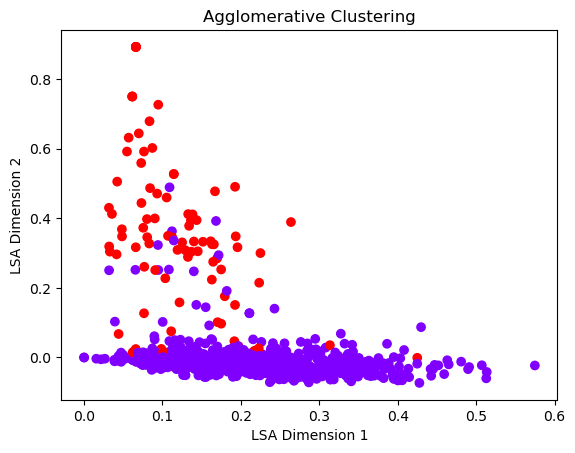

In [31]:
# Visualize the clustering results
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('LSA Dimension 1')
plt.ylabel('LSA Dimension 2')
plt.show()

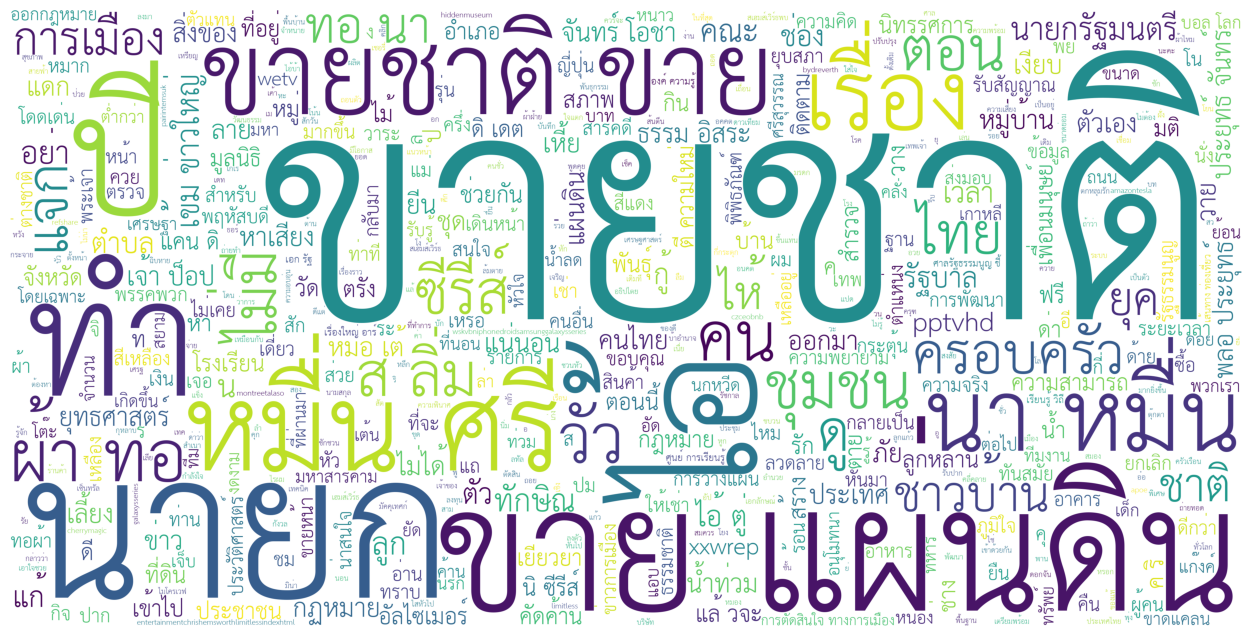

In [32]:
pos_word_all = " ".join(text for text in df[df['Hierarchical']==1]['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=500, height = 2000, width=4000, font_path=font_path, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

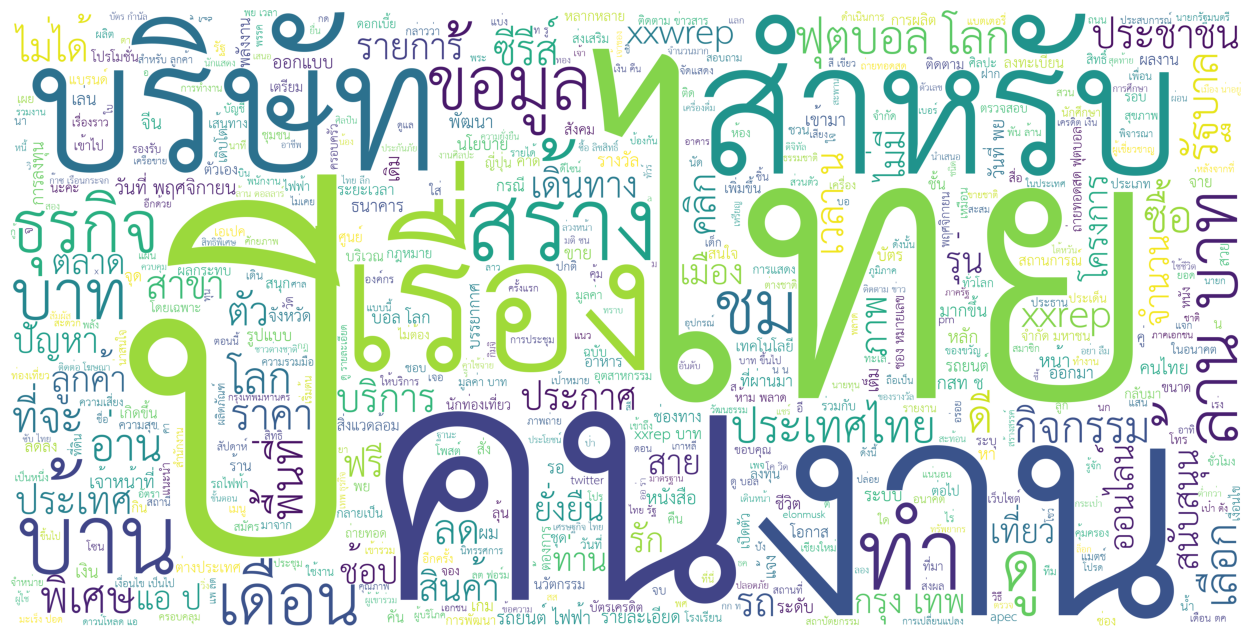

In [33]:
pos_word_all = " ".join(text for text in df[df['Hierarchical']==0]['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=500, height = 2000, width=4000, font_path=font_path, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Result in wordcloud is quite good similar to KMEANS.

## Model Selection

In first step before, we saw overall performance by ploting wordcloud. we denied LDA topic modeling and DBSCAN in order of bad performance. Moreover, we can compare 2 models (KMEANS,Hierarchical) by select the best fit of each model and compare it.

KMEANS : \
silhouette_avg : 0.02870837928001586 \
davies_bouldin : 3.748592258275824 \
Calinski-Harabasz : 19.06347922131924 \
Hierarchical : \
silhouette_avg : 0.023068462048296604 \
davies_bouldin : 5.013966114898365 \
Calinski-Harabasz : 14.547918805551792 

We select KMEANS in order of better performance.

In [34]:
df.to_csv("fb_data_sa.csv", index=False) # export labeling df from clustering method to csv to make dashboard in looker studio 